In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("home_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Question 1) Average price for those with zipcode == 98039
average_price1 = df[df['zipcode'] == 98039]['price'].mean()
average_price1

2160606.6

In [ ]:
#Question 2) Filtering data
filtered_data = df[(df['sqft_living'] >= 2000) & (df['sqft_living'] <= 4000)]
fraction_of_houses = len(filtered_data) / len(df)
#print(filtered_data)
print(fraction_of_houses)

0.4266413732475825


In [ ]:
#Question 3) Building a regression model with several more features
#1.Splitting training data and teting data for the three models

def train_test_data(features):
    X = df[features]
    y = df[["price"]]
    return train_test_split(X, y, test_size=0.2, random_state=0)

one_feature = ["sqft_living"]  # Convert to a list of column names
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
    'condition', 'grade', 'waterfront', 'view', 'sqft_above',
    'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
    'sqft_living15', 'sqft_lot15'
]

x_train1,x_test1,y_train1,y_test1 = train_test_data(one_feature)
x_train2,x_test2,y_train2,y_test2 = train_test_data(my_features)
x_train3,x_test3,y_train3,y_test3 = train_test_data(advanced_features)


In [ ]:
#building the models

# For one_feature dataset : SIMPLE REGRESSION


def simple_polynomial_regression(x_train, y_train, x_test, y_test, degree):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate the mean squared error for training and testing data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='blue', label='Test Data')
    plt.plot(x_test, y_test_pred, color='red', label='Polynomial Regression (degree {})'.format(degree))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Polynomial Regression (Degree {})'.format(degree))
    plt.show()

    print("The couple (rmse_train, rmse_test)")
    return rmse_train, rmse_test




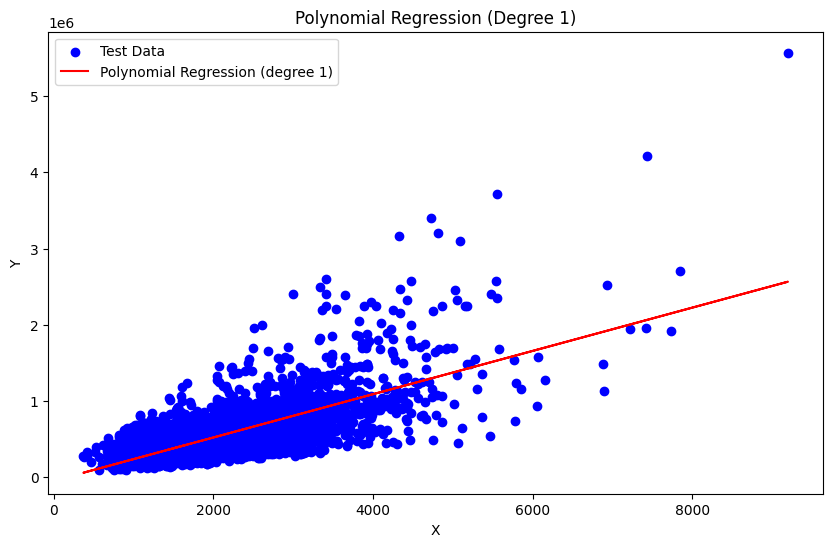

The couple (rmse_train, rmse_test)


(264522.9637718296, 248879.0614364701)

In [ ]:
simple_polynomial_regression(x_train1, y_train1, x_test1, y_test1, 1)

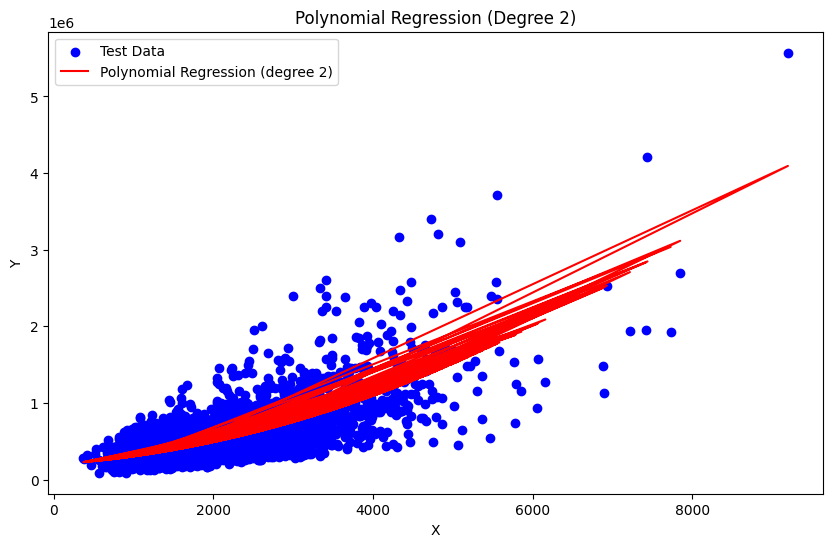

The couple (rmse_train, rmse_test)


(253566.7152383135, 240272.02091172073)

In [ ]:
simple_polynomial_regression(x_train1, y_train1, x_test1, y_test1, 2)

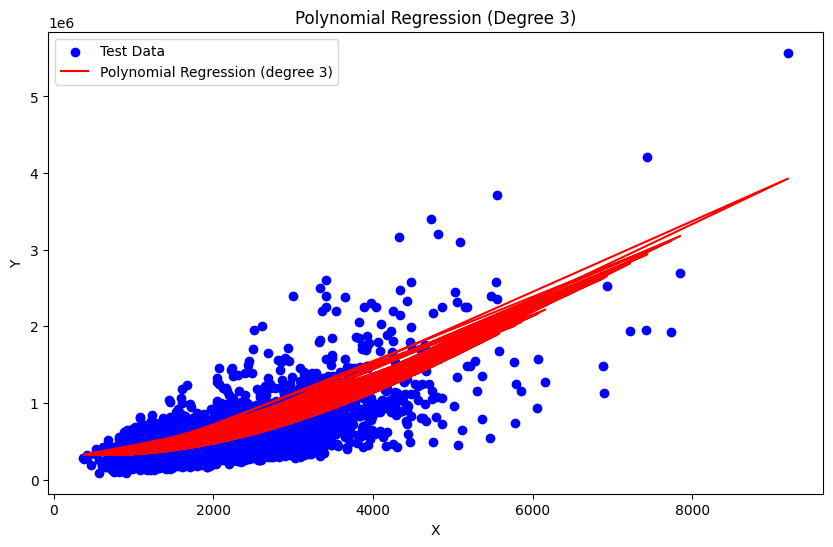

The couple (rmse_train, rmse_test)


(251330.21048629188, 241010.83354570667)

In [ ]:
simple_polynomial_regression(x_train1, y_train1, x_test1, y_test1, 3)

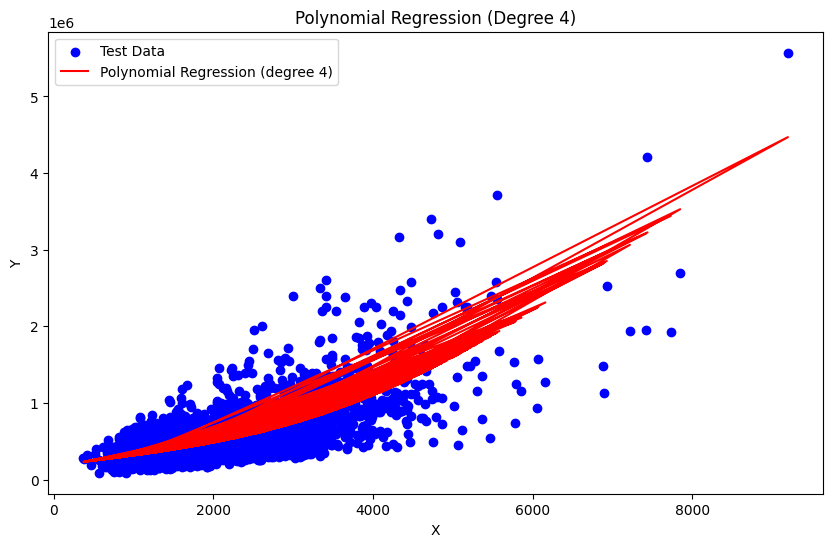

The couple (rmse_train, rmse_test)


(250290.54889974557, 242116.05481741388)

In [ ]:
simple_polynomial_regression(x_train1, y_train1, x_test1, y_test1, 4)

**Donc le modèle avec degré 2 est le meilleur dans ce cas**

In [ ]:
#Model 2 and 3 : Multivariable polynomial regression

def multivariable_polynomial_regression(x_train, y_train, x_test, y_test, degree):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # Calculate the mean squared error for training and testing data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    print("The couple (rmse_train, rmse_test)")
    return rmse_train, rmse_test


In [ ]:
#model 2
multivariable_polynomial_regression(x_train2, y_train2, x_test2, y_test2, 1)

The couple (rmse_train, rmse_test)


(258524.68484833528, 244004.77443104456)

In [ ]:
multivariable_polynomial_regression(x_train2, y_train2, x_test2, y_test2, 2)

The couple (rmse_train, rmse_test)


(242873.874926397, 230483.98089576338)

In [ ]:
multivariable_polynomial_regression(x_train2, y_train2, x_test2, y_test1, 3)

The couple (rmse_train, rmse_test)


(249139.14192094028, 234030.15402590888)

In [ ]:
multivariable_polynomial_regression(x_train2, y_train2, x_test2, y_test2, 4)

The couple (rmse_train, rmse_test)


(244413.658630476, 233077.97321276154)

**le polynome de degré 2 est le meilleur modèle dans ce cas**

In [ ]:
#model 3

multivariable_polynomial_regression(x_train3, y_train3, x_test3, y_test3, 1)

The couple (rmse_train, rmse_test)


(203805.4105552402, 190473.37570967586)

In [ ]:
multivariable_polynomial_regression(x_train3, y_train3, x_test3, y_test3, 2)

The couple (rmse_train, rmse_test)


(152119.62511533312, 152404.7107424969)

In [ ]:
multivariable_polynomial_regression(x_train3, y_train3, x_test3, y_test3, 3)

The couple (rmse_train, rmse_test)


(140269.1135035753, 270373.330728442)

In [ ]:
multivariable_polynomial_regression(x_train3, y_train3, x_test3, y_test3, 4)

The couple (rmse_train, rmse_test)


(123236.30519835358, 9900083.717840362)

**Dans  ce cas aussi le meilleur modèle est le quadratique**




**> Choix meilleur modèle**

Le meilleur modèle dans notre cas d'étude est le modèle de régression polynomiale d'ordre 2 et qui a été entrainé sur *advanced_features*







